In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

xlim = -5,5
ylim = -5,5

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Fitting a function: $y = f(x) + \epsilon$

Linear model: $f(x) = ax + b$

How do we simulate from a linear model? Define distributions for 
$p(a), p(b), p(\epsilon)$



(-5, 5)

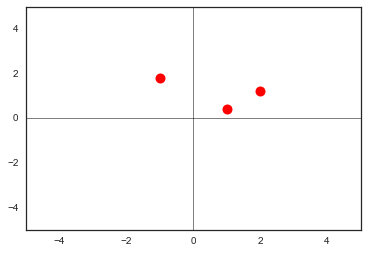

In [2]:
x = np.array([-1., 1, 2])
y = np.array([1.8, 0.4, 1.2])

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

In [3]:
def make_design_matrix(x, degree=1):
    X = np.ones((x.shape[0],1+degree))
    for i in xrange(1,1+degree):
        X[:,i] = x**i
    return X

In [4]:
def bayesian_linear_regression(x, y, degree=1, beta=10.):
    Phi = make_design_matrix(x, degree)
    D = Phi.shape[1]
    S_N = np.linalg.inv(np.eye(D) + beta*np.dot(Phi.T, Phi))
    m_N = np.dot(S_N, beta*np.dot(Phi.T, y))
    return m_N, S_N

In [18]:
domain = np.linspace(xlim[0], xlim[1], num=100)

## Completely random linear functions

(-5, 5)

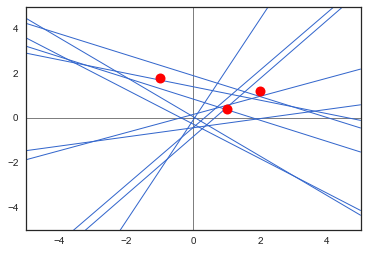

In [19]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(np.zeros(2), np.identity(2))), color='#3366CC', linewidth=1)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## Linear functions which match the data

(-5, 5)

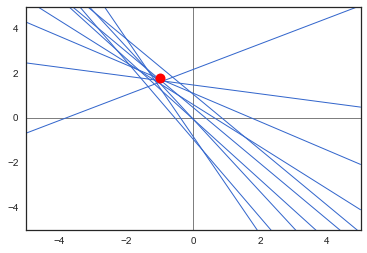

In [20]:
m_N, S_N = bayesian_linear_regression(x[:1], y[:1], 1)

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x[:1], y[:1], 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

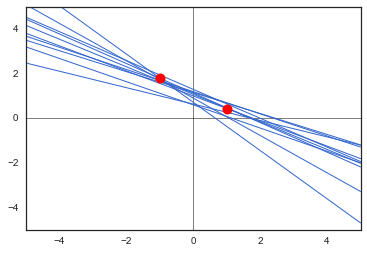

In [21]:
m_N, S_N = bayesian_linear_regression(x[:2], y[:2], 1)

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x[:2], y[:2], 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

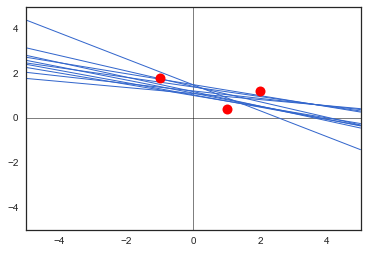

In [22]:
m_N, S_N = bayesian_linear_regression(x, y, 1)

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## Add more data

In [23]:
x_bigger = np.array([-1., 1, 2, 4, -2])
y_bigger = np.array([1.8, 0.4, 1.2, -1.1, 2.2])

m_N, S_N = bayesian_linear_regression(x_bigger, y_bigger, 1)

(-5, 5)

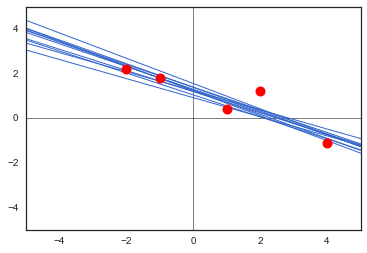

In [24]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x_bigger, y_bigger, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## More complicated functions: polynomial functions of random degree

In [25]:
def plot_random(domain):
    degree = np.random.geometric(0.5)
    Phi = make_design_matrix(domain, degree)
    #print degree
    D = Phi.shape[1]
    plt.plot(domain, np.dot(Phi, np.random.multivariate_normal(np.zeros(D), np.identity(D))), linewidth=1)

(-5, 5)

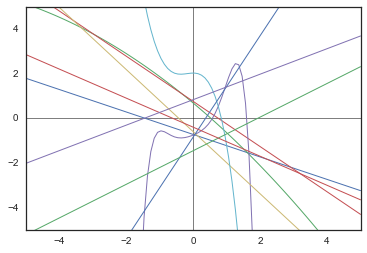

In [26]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random(domain)
# plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

In [27]:
def plot_random_fit_polynomial(domain, x, y):
    degree = np.random.geometric(0.5)
    m_N, S_N = bayesian_linear_regression(x, y, degree)
    Phi = make_design_matrix(domain, degree)
    plt.plot(domain, np.dot(Phi, np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)

(-5, 5)

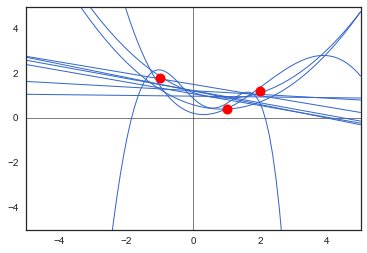

In [28]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random_fit_polynomial(domain, x, y)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

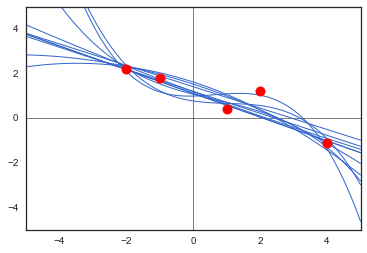

In [30]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random_fit_polynomial(domain, x_bigger, y_bigger)
plt.plot(x_bigger, y_bigger, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)